# **REVIEW DATASET**

In [ ]:
import pandas as pd
import numpy as np
TWEET_DATA = pd.read_csv('dataset_mentah.csv', names=['time','id','user','tweet','sentimen'])
TWEET_DATA

,time,id,user,tweet,sentimen
0,2021-07-23 23:58:02,1418722101184237569,Jojo86,@Andiarief__ PPKM sudah gagal total krn disemu...,negatif
1,2021-07-23 23:57:16,1418721908191744001,Rizal Rosyadi,@GOAL_ID Gak usah mikir tropi Son Penting perp...,negatif
2,2021-07-23 23:57:02,1418721850289397762,willy_rosiyandi,Ga mampu bikin sejahtera rakyat bisanya buat a...,negatif
3,2021-07-23 23:56:46,1418721785449644033,Izzuddin,@IrutPagut Lockdown aja lah sekalian ppkm psbb...,negatif
4,2021-07-23 23:56:38,1418721752289398786,Sukma,@democrazymedia @Syifazzzzzzz Gmn Bisa gembira...,negatif
...,...,...,...,...,...
2078,2021-07-31 0:39:00,1421269125876174849,Raja 👑,@rizkydrahmawan @CallMyN36153111 @RachlanNashi...,positif
2079,2021-07-31 4:25:27,1421326115071619072,#DM#,Keputusan @jokowi memperlakukan PPKM sdh tepat...,positif
2080,2021-07-31 3:53:00,1421317947780259842,Gita M novisra,kita harus bersyukur penambahan kasus covid me...,positif
2081,2021-07-31 14:41:44,1421481206479159302,Ajeng Nurnaida,PPKM lebih produktif ditemenin Smartfren Gokil...,positif


**SEPARATE DATASET BASED ON SENTIMEN LABEL**

In [ ]:
dataset_positif = TWEET_DATA[TWEET_DATA['sentimen'] == "positif"]

# Save dataframe yang berlebel positif
dataset_positif.to_csv("data_positif.csv")

dataset_baru_positif = pd.read_csv('data_positif.csv')
del dataset_baru_positif['Unnamed: 0']
dataset_baru_positif

,time,id,user,tweet,sentimen
0,2021-07-23 5:22:50,1418441454729502727,smaliska,Demi Keselamatan Masyarakat Gus Sholeh Dukung ...,positif
1,2021-07-23 23:57:15,1418721906161713155,dul ⛱️,Selamat pagiii yuk sehat sehat yuk biar bisa k...,positif
2,2021-07-23 23:52:59,1418720833581715456,beritaterkini86🇮🇩,Masyarakat mendukung sinergitas seluruh lembag...,positif
3,2021-07-23 23:46:23,1418719170867331072,Adli Furqan,@Innayaputri72 Ppkm atau apapun namanya byk yg...,positif
4,2021-07-23 23:31:29,1418715420383596544,Dlur_* 🇮🇩☕️,@Andiarief__ dengan adanya PPKM bisa menyelama...,positif
...,...,...,...,...,...
940,2021-07-31 0:39:00,1421269125876174849,Raja 👑,@rizkydrahmawan @CallMyN36153111 @RachlanNashi...,positif
941,2021-07-31 4:25:27,1421326115071619072,#DM#,Keputusan @jokowi memperlakukan PPKM sdh tepat...,positif
942,2021-07-31 3:53:00,1421317947780259842,Gita M novisra,kita harus bersyukur penambahan kasus covid me...,positif
943,2021-07-31 14:41:44,1421481206479159302,Ajeng Nurnaida,PPKM lebih produktif ditemenin Smartfren Gokil...,positif


In [ ]:
dataset_negatif = TWEET_DATA[TWEET_DATA['sentimen'] == "negatif"]

# Save dataframe yang berlebel negatif
dataset_negatif.to_csv("data_negatif.csv")

dataset_baru_negatif = pd.read_csv('data_negatif.csv')
del dataset_baru_negatif['Unnamed: 0']
dataset_baru_negatif

,time,id,user,tweet,sentimen
0,2021-07-23 23:58:02,1418722101184237569,Jojo86,@Andiarief__ PPKM sudah gagal total krn disemu...,negatif
1,2021-07-23 23:57:16,1418721908191744001,Rizal Rosyadi,@GOAL_ID Gak usah mikir tropi Son Penting perp...,negatif
2,2021-07-23 23:57:02,1418721850289397762,willy_rosiyandi,Ga mampu bikin sejahtera rakyat bisanya buat a...,negatif
3,2021-07-23 23:56:46,1418721785449644033,Izzuddin,@IrutPagut Lockdown aja lah sekalian ppkm psbb...,negatif
4,2021-07-23 23:56:38,1418721752289398786,Sukma,@democrazymedia @Syifazzzzzzz Gmn Bisa gembira...,negatif
...,...,...,...,...,...
1133,2021-07-27 14:10:05,1420023690528542720,🍀 Kak Roz 🍀,@langityang7 @bonngbudi Rakyat kecil yang berp...,negatif
1134,2021-07-27 14:09:56,1420023654050631689,Rijal,Sebulan gak futsal grgr ppkm kaki jd lemes gini,negatif
1135,2021-07-27 14:09:03,1420023430930382859,kuki,Bapak-bapak lagi mikirin spp anak kebingungan ...,negatif
1136,2021-07-27 13:46:08,1420017664311926788,Sugik,@jokowi Tapi perhatikan masyarakat pendatang j...,negatif


# **TEXT PRE-PROCESSING**

In [ ]:
# Setup (Instalasi Library NLTK)
import nltk

**CASE FOLDING**

In [ ]:
# ------ Case Folding --------
# gunakan fungsi Series.str.lower() pada Pandas
dataset_baru_positif['tweet'] = dataset_baru_positif['tweet'].str.lower()
dataset_baru_negatif['tweet'] = dataset_baru_negatif['tweet'].str.lower()


print('Case Folding Result : \n')
print(dataset_baru_positif['tweet'])
print('\n\n\n')
print(dataset_baru_negatif['tweet'])

Case Folding Result : 

0      demi keselamatan masyarakat gus sholeh dukung ...
1      selamat pagiii yuk sehat sehat yuk biar bisa k...
2      masyarakat mendukung sinergitas seluruh lembag...
3      @innayaputri72 ppkm atau apapun namanya byk yg...
4      @andiarief__ dengan adanya ppkm bisa menyelama...
                             ...                        
940    @rizkydrahmawan @callmyn36153111 @rachlannashi...
941    keputusan @jokowi memperlakukan ppkm sdh tepat...
942    kita harus bersyukur penambahan kasus covid me...
943    ppkm lebih produktif ditemenin smartfren gokil...
944    @saltopocong setuju kak selama ppkm makin prod...
Name: tweet, Length: 945, dtype: object




0       @andiarief__ ppkm sudah gagal total krn disemu...
1       @goal_id gak usah mikir tropi son penting perp...
2       ga mampu bikin sejahtera rakyat bisanya buat a...
3       @irutpagut lockdown aja lah sekalian ppkm psbb...
4       @democrazymedia @syifazzzzzzz gmn bisa gembira...
               

**TOKENIZING**

In [ ]:
import nltk
nltk.download('punkt')

import string 
import re #regex library


# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist


# ------ Tokenizing ---------

def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
dataset_baru_positif['tweet'] = dataset_baru_positif['tweet'].apply(remove_tweet_special)
dataset_baru_negatif['tweet'] = dataset_baru_negatif['tweet'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

dataset_baru_positif['tweet'] = dataset_baru_positif['tweet'].apply(remove_number)
dataset_baru_negatif['tweet'] = dataset_baru_negatif['tweet'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

dataset_baru_positif['tweet'] = dataset_baru_positif['tweet'].apply(remove_punctuation)
dataset_baru_negatif['tweet'] = dataset_baru_negatif['tweet'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

dataset_baru_positif['tweet'] = dataset_baru_positif['tweet'].apply(remove_whitespace_LT)
dataset_baru_negatif['tweet'] = dataset_baru_negatif['tweet'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

dataset_baru_positif['tweet'] = dataset_baru_positif['tweet'].apply(remove_whitespace_multiple)
dataset_baru_negatif['tweet'] = dataset_baru_negatif['tweet'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

dataset_baru_positif['tweet'] = dataset_baru_positif['tweet'].apply(remove_singl_char)
dataset_baru_negatif['tweet'] = dataset_baru_negatif['tweet'].apply(remove_singl_char)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

dataset_baru_positif['tweet_tokens'] = dataset_baru_positif['tweet'].apply(word_tokenize_wrapper)
dataset_baru_negatif['tweet_tokens'] = dataset_baru_negatif['tweet'].apply(word_tokenize_wrapper)

print(dataset_baru_positif['tweet_tokens'])
print('\n\n\n')
print(dataset_baru_negatif['tweet_tokens'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
0      [demi, keselamatan, masyarakat, gus, sholeh, d...
1      [selamat, pagiii, yuk, sehat, sehat, yuk, biar...
2      [masyarakat, mendukung, sinergitas, seluruh, l...
3      [ppkm, atau, apapun, namanya, byk, yg, dukung,...
4      [dengan, adanya, ppkm, bisa, menyelamatkan, ny...
                             ...                        
940    [bersyukur, kita, masih, hidup, berarti, ppkm,...
941    [keputusan, memperlakukan, ppkm, sdh, tepat, d...
942    [kita, harus, bersyukur, penambahan, kasus, co...
943    [ppkm, lebih, produktif, ditemenin, smartfren,...
944    [setuju, kak, selama, ppkm, makin, produktif, ...
Name: tweet_tokens, Length: 945, dtype: object




0       [ppkm, sudah, gagal, total, krn, disemua, nega...
1       [id, gak, usah, mikir, tropi, son, penting, pe...
2       [ga, mampu, bikin, sejahtera, rakyat, bisanya,...
3       [lockdown, aja, lah, sekalian

**NORMALIZATION\FORMALIZATION**

In [ ]:
normalizad_word = pd.read_excel("normalisasi.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

dataset_baru_positif['tweet_normalized'] = dataset_baru_positif['tweet_tokens'].apply(normalized_term)
dataset_baru_negatif['tweet_normalized'] = dataset_baru_negatif['tweet_tokens'].apply(normalized_term)

print(dataset_baru_positif['tweet_normalized'].head(10))
print('\n\n\n')
print(dataset_baru_negatif['tweet_normalized'].head(10))

0    [demi, keselamatan, masyarakat, gus, sholeh, d...
1    [selamat, pagiii, yuk, sehat, sehat, yuk, biar...
2    [masyarakat, mendukung, sinergitas, seluruh, l...
3    [ppkm, atau, apapun, namanya, byk, yg, dukung,...
4    [dengan, adanya, ppkm, bisa, menyelamatkan, ny...
5    [pak, jokowi, terima, kasih, selama, ppkm, say...
6    [tokoh, agama, kristen, dukung, pemberlakuan, ...
7        [walau, ada, ppkm, ekonomi, ri, bisa, tumbuh]
8    [mantul, nih, kinerja, ppkm, berdampak, positi...
9    [ayo, kita, membantu, pemerintah, dalam, menga...
Name: tweet_normalized, dtype: object




0    [ppkm, sudah, gagal, total, krn, disemua, nega...
1    [id, tidak, usah, mikir, tropi, son, penting, ...
2    [tidak, mampu, bikin, sejahtera, rakyat, bisan...
3    [lockdown, aja, lah, sekalian, ppkm, psbb, ada...
4    [gmn, bisa, gembira, main, tidak, bisa, yg, mo...
5              [pengen, bubur, ayam, tp, ppkm, anjing]
6    [fadhlan, wabah, yg, bgm, ini, jelas, merugi, ...
7    [masyakarat, susah

**FILTERING (Stopword Removal) and (Removing 'PPKM' & 'DARURAT')**

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword (MENGHAPUS 'PPKM' & 'DARURAT')
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'ppkm', 'darurat', 'kalo', 'amp', 'biar', 'bikin', 'bilang', 'birthday', 'doang', 'dong', 'cari', 'itu',
                       'krn', 'karna', 'nya', 'nih', 'sih', 'udh', 'sampai', 'kenapa', 'duluan', 'ada', 'abis', 'ugh', 'pengen',
                       'si', 'tau', 'tuh', 'utk', 'ya', 'trs', 'sm', 'padahal', 'lagi', 'dpt', 'dapat', 'dapet', 'ken', 'mlu',
                       'jd', 'sdh', 'aja', 'n', 't', 'pas', 'psbb', 'yang', 'apa', 'yang', 'banyak', 'buat', 'pls', 'mulu', 'cari',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt', 'emg', 'buat', 'sdg', 'pada', 'pda', 'allah', 'ydh', 'yaudah',
                       '&amp', 'banget', 'yah'])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)

# tidak menghilangkan kata negasi
for word in list_stopwords.copy():
    if (word == 'tidak'):
      list_stopwords.remove('tidak')
    elif (word == 'kagak'):
      list_stopwords.remove('kagak')
    elif (word == 'tak'):
      list_stopwords.remove('tak')
    elif (word == 'enggak'):
      list_stopwords.remove('enggak')
    elif (word == 'bukan'):
      list_stopwords.remove('bukan')
    elif (word == 'masalah'):
      list_stopwords.remove('masalah')
    elif (word == 'guna'):
      list_stopwords.remove('guna')

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

dataset_baru_positif['tweet_tokens_WSW'] = dataset_baru_positif['tweet_normalized'].apply(stopwords_removal) 
dataset_baru_negatif['tweet_tokens_WSW'] = dataset_baru_negatif['tweet_normalized'].apply(stopwords_removal) 

print(dataset_baru_positif['tweet_tokens_WSW'].head(10))
print('\n\n\n')
print(dataset_baru_negatif['tweet_tokens_WSW'].head(10))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
0    [keselamatan, masyarakat, gus, sholeh, dukung,...
1    [selamat, pagiii, sehat, sehat, ketemu, orango...
2    [masyarakat, mendukung, sinergitas, lembaga, p...
3    [apapun, namanya, dukung, ulama, tlah, sesuai,...
4    [menyelamatkan, nyawa, manusia, rief, tanggung...
5    [jokowi, terima, kasih, terima, bpum, bri, sek...
6    [tokoh, agama, kristen, dukung, pemberlakuan, ...
7                                [ekonomi, ri, tumbuh]
8    [mantul, kinerja, berdampak, positif, iklim, i...
9    [ayo, membantu, pemerintah, mengatasi, pandemi...
Name: tweet_tokens_WSW, dtype: object




0    [gagal, total, disemua, negara, cuman, negara,...
1    [id, tidak, mikir, tropi, son, perpanjang, kon...
2    [tidak, sejahtera, rakyat, bisanya, aturan, ra...
3    [lockdown, perubahan, virusnya, ningkat, coba,...
4       [gembira, main, tidak, dimakan, susah, akibat]
5                     

In [ ]:
# Save hasil text prepocessing

dataset_baru_positif['tweet_tokens_WSW'].to_csv("positive-data.csv")
dataset_baru_negatif['tweet_tokens_WSW'].to_csv("negative-data.csv")

**WORDCLOUD**

In [ ]:
!pip install -q wordcloud
import wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Wordcloud dataset positif

df = pd.read_csv('positive-data.csv')
isi_text_positif = df['tweet_tokens_WSW']
isi_text = []

for text in isi_text_positif:
    text = [x.strip(string.punctuation) for x in text]
    isi_text.append(text)

isi_text[0]

text_positif = ["".join(text) for text in isi_text]
final_text_positif = " ".join(text_positif)
final_text_positif

'keselamatan masyarakat gus sholeh dukung perpanjangan selamat pagiii sehat sehat ketemu orangorang tercinta habis masyarakat mendukung sinergitas lembaga pemerintah lelah membasmi covid apapun namanya dukung ulama tlah sesuai syariat menghadapi wabah menyelamatkan nyawa manusia rief tanggung moral sel jokowi terima kasih terima bpum bri sekeluarga sehat slalu tokoh agama kristen dukung pemberlakuan pemerintah ekonomi ri tumbuh mantul kinerja berdampak positif iklim investasi geliatnya investor asing borong saham ayo membantu pemerintah mengatasi pandemi covid mematuhi aturan menjalankan prokes longgarkan dki jakarta waspada provokasi bantu nakes disiplin selesai jalanjalan rumah tebet rumah udaranya menikmati terbaik rakyat indonesia tidak berjilid sabtu gini senang jomblo randeyank radolan dukung penuh pelaksanaan keselamatan muhammadiyah dukung perpanjangan kebaikan bantunakes disiplin semoga prediksi terwujud gencar berdampak positif pergerakan harga saham ariza sematamata keselama

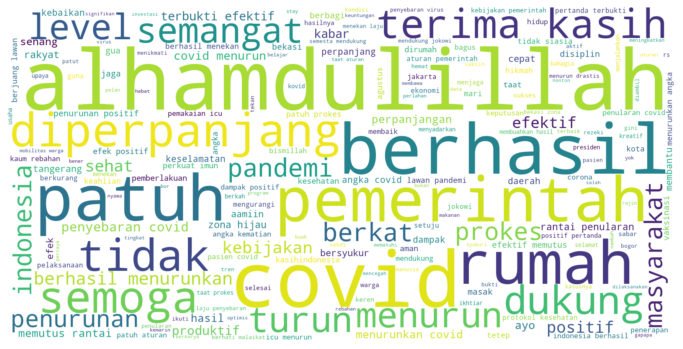

In [ ]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color='white').generate(final_text_positif)

plt.figure(figsize=(12,10))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

In [ ]:
# Wordcloud dataset negatif

df = pd.read_csv('negative-data.csv')
isi_text_negatif = df['tweet_tokens_WSW']
isi_text = []

for text in isi_text_negatif:
    text = [x.strip(string.punctuation) for x in text]
    isi_text.append(text)

isi_text[0]

text_negatif = ["".join(text) for text in isi_text]
final_text_negatif = " ".join(text_negatif)
final_text_negatif

'gagal total disemua negara cuman negara alergi lockdown id tidak mikir tropi son perpanjang kontrak duit kondisi gini susah tidak sejahtera rakyat bisanya aturan rakyat tidak dikasi makan mending lockdown perubahan virusnya ningkat coba lokcdown coba lokcdown gembira main tidak dimakan susah akibat bubur ayam anjing fadhlan wabah bgm merugi rakyat solusinya ap ngsh makan rakyatnya masyakarat susah makan hmi sumut desak pemerintah penolakan bdg iniih krna kbijakan sngt merugi segi ekonomi capek gini sepi gaada buka loker perpanjangan pemberlakuan pembatasan kegiatan masyarakat kekecewaan pusing kekacauan model nyuruh ttep dirumah kaga ngasih gonta ganti nama bukan solusi namanya tidak pengaruh pemerintah gagal tolol pelan pelan meninggal plecon sedari gagal pemakaian karantina diganti istilah mensahkan uu capek tidak suka perpanjang menambah derita rakyat tidak kawan tidak duit seret rakyat sengsara perpanjangan imun tubuh masyarakat menurun memperhatikan uu karantina kebijakan kebijak

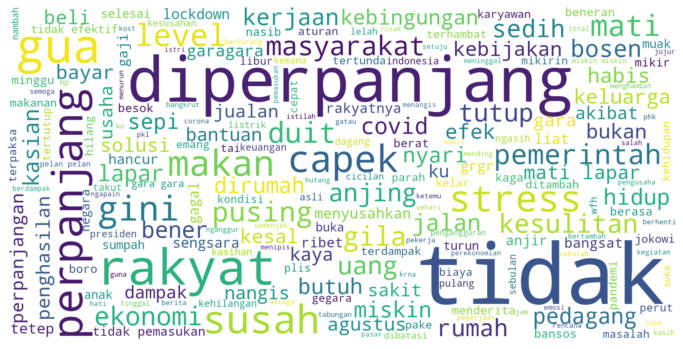

In [ ]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color='white').generate(final_text_negatif)

plt.figure(figsize=(12,10))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()